### Постановка задачи

Для примера сгенерируем выборку из распределения с плотностью  

$\varphi(x) = \frac{3}{8}(x + 1)^2, \quad x \in [-1, 1] = [a, b].$

Для данной непрерывной случайной величины требуется:

- проверить условие нормировки плотности вероятности;
- построить графики плотности распределения и функции распределения;
- вычислить вероятность попадания случайной величины в заданный интервал;
- найти математическое ожидание, дисперсию и среднее квадратическое отклонение;
- вычислить квантиль уровня \(q\) и \(p\%\)-ную точку случайной величины;
- определить коэффициент асимметрии и эксцесс.


Размер выборки: 10000
Первые 10 значений:
[ 0.96758666  0.44455928  0.89331529  0.95258603  0.44982025  0.8710667
 -0.38214499  0.21110609  0.42722214  0.28366182]

Проверка нормировки плотности:
∫ φ(x) dx = 1.000000, погрешность = 1.11e-14

Проверка функции распределения:
F(-1) = 0.000000
F(1)  = 1.000000

P(-0.3 ≤ X ≤ 0.6) = 0.4691

*************ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ**************
Математическое ожидание: 0.5000
Дисперсия: 0.1500
СКО: 0.3873
Асимметрия: -0.8607
Эксцесс: 0.0952

Квантили:
25%-квантиль: 0.2599
75%-квантиль: 0.8171


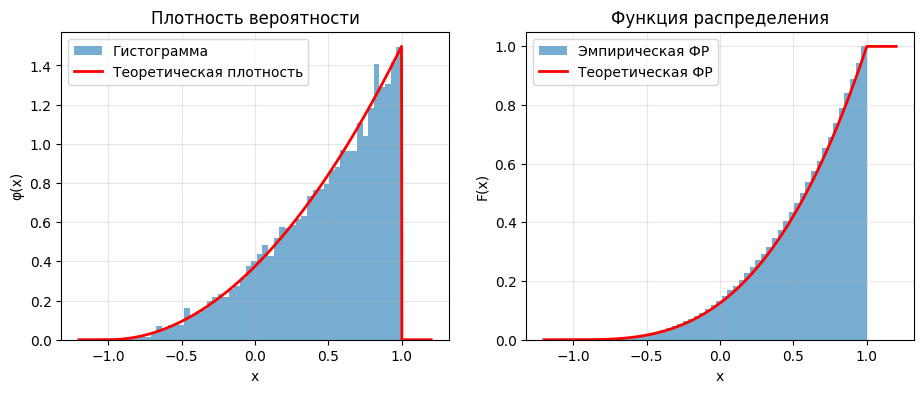

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

class CustomDistribution(rv_continuous):

    def __init__(self):
        super().__init__(a=-1, b=1, name='custom_dist')

    def _pdf(self, x):
        return np.where((x >= -1) & (x <= 1), 3/8 * (x + 1)**2, 0)

    def _cdf(self, x):
        result = np.zeros_like(x)
        result[x < -1] = 0
        mask = (x >= -1) & (x <= 1)
        result[mask] = ((x[mask] + 1)**3) / 8
        result[x > 1] = 1
        return result

    def _ppf(self, q):
        return 2 * q**(1/3) - 1

# Создание распределения и выборки
dist = CustomDistribution()
sample = dist.rvs(size=10000)

print(f"Размер выборки: {len(sample)}")
print("Первые 10 значений:")
print(sample[:10])

# Проверка нормировки
integral, error = integrate.quad(dist.pdf, -1, 1)
print("\nПроверка нормировки плотности:")
print(f"∫ φ(x) dx = {integral:.6f}, погрешность = {error:.2e}")

# Проверка функции распределения
print("\nПроверка функции распределения:")
print(f"F(-1) = {dist.cdf(-1):.6f}")
print(f"F(1)  = {dist.cdf(1):.6f}")

# Вероятность попадания в интервал
a_int, b_int = -0.3, 0.6
prob = dist.cdf(b_int) - dist.cdf(a_int)
print(f"\nP({a_int} ≤ X ≤ {b_int}) = {prob:.4f}")

# Числовые характеристики
print("\n" + "ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ".center(50, "*"))
print(f"Математическое ожидание: {dist.mean():.4f}")
print(f"Дисперсия: {dist.var():.4f}")
print(f"СКО: {dist.std():.4f}")

m, v, s, k = dist.stats(moments="mvsk")
print(f"Асимметрия: {s:.4f}")
print(f"Эксцесс: {k:.4f}")

# Квантили
print("\nКвантили:")
print(f"25%-квантиль: {dist.ppf(0.25):.4f}")
print(f"75%-квантиль: {dist.ppf(0.75):.4f}")

# Графики
x = np.linspace(-1.2, 1.2, 1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

ax1.hist(sample, bins=50, density=True, alpha=0.6, label='Гистограмма')
ax1.plot(x, dist.pdf(x), 'r', lw=2, label='Теоретическая плотность')
ax1.set_title("Плотность вероятности")
ax1.set_xlabel("x")
ax1.set_ylabel("φ(x)")
ax1.legend()
ax1.grid(alpha=0.3)

ax2.hist(sample, bins=50, density=True, cumulative=True, alpha=0.6, label='Эмпирическая ФР')
ax2.plot(x, dist.cdf(x), 'r', lw=2, label='Теоретическая ФР')
ax2.set_title("Функция распределения")
ax2.set_xlabel("x")
ax2.set_ylabel("F(x)")
ax2.legend()
ax2.grid(alpha=0.3)

plt.show()
